# Medical Cost

* Dataset is taken from Kaggle which has the medical charges of a patient, their age, bmi, gender, number of children they have, region they belong to, whether they smoke or not.

Information about data :
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance


* Here we are trying to analyse the given dataset and visualize it by plotting graph using different parameters.
* Tools used are Numpy, Pandas, Matplotlib, Seaborn.
* We have attended the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) which taught us how to analyse the data and how to visualize it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

* We downloaded a data set from https://www.kaggle.com/datasets?fileType=csv page and used it for our project.
* The data set has 1338 rows and 7 columns.
* The data is in CSV format 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mirichoi0218/insurance' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mansisharma9
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 2.35MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './insurance'

In [5]:
import os
os.listdir(data_dir)

['insurance.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "medical-cost-analysis-of-patients" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:

## Data Preparation and Cleaning

* First we load dataset into data frame using pandas 
* Take a look at data using .describe() and .info() method
* Analyse the entire data set.

In [ ]:
import pandas as pd
medical_record_df = pd.read_csv('./insurance/insurance.csv')
medical_record_df

In [12]:
medical_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
medical_record_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here we filter the data based on column "children" as it will be required later.

In [12]:
zerochild_df = medical_record_df[medical_record_df['children']==0]
zerochild_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
9,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
onechild_df = medical_record_df[medical_record_df['children']==1]
onechild_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
6,46,female,33.440,1,no,southeast,8240.58960
15,19,male,24.600,1,no,southwest,1837.23700
16,52,female,30.780,1,no,northeast,10797.33620
21,30,female,32.400,1,no,southwest,4149.73600
...,...,...,...,...,...,...,...
1310,42,male,26.315,1,no,northwest,6940.90985
1312,34,male,42.900,1,no,southwest,4536.25900
1315,18,male,28.310,1,no,northeast,11272.33139
1324,31,male,25.935,1,no,northwest,4239.89265


In [14]:
twochild_df = medical_record_df[medical_record_df['children']==2]
twochild_df

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
24,37,male,28.025,2,no,northwest,6203.90175
27,55,female,32.775,2,no,northwest,12268.63225
29,31,male,36.300,2,yes,southwest,38711.00000
41,31,female,36.630,2,no,southeast,4949.75870
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1323,42,female,40.370,2,yes,southeast,43896.37630
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600


In [15]:
threechild_df = medical_record_df[medical_record_df['children']==3]
threechild_df

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
7,37,female,27.740,3,no,northwest,7281.50560
25,59,female,27.720,3,no,southeast,14001.13380
36,62,female,32.965,3,no,northwest,15612.19335
54,40,female,28.690,3,no,northwest,8059.67910
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1314,30,female,23.655,3,yes,northwest,18765.87545
1320,31,male,31.065,3,no,northwest,5425.02335
1332,52,female,44.700,3,no,southwest,11411.68500


In [16]:
fourchild_df = medical_record_df[medical_record_df['children']==4]
fourchild_df

,age,sex,bmi,children,smoker,region,charges
61,25,male,33.660,4,no,southeast,4504.66240
83,48,female,41.230,4,no,northwest,11033.66170
165,47,male,28.215,4,no,northeast,10407.08585
211,40,male,30.875,4,no,northwest,8162.71625
258,51,male,24.415,4,no,northwest,11520.09985
321,26,female,29.640,4,no,northeast,24671.66334
344,49,female,41.470,4,no,southeast,10977.20630
390,48,male,35.625,4,no,northeast,10736.87075
450,39,male,29.600,4,no,southwest,7512.26700
494,21,male,25.700,4,yes,southwest,17942.10600


In [17]:
fivechild_df = medical_record_df[medical_record_df['children']==5]
fivechild_df

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [20]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mansi3393/medical-cost-analysis-of-patients" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mansi3393/medical-cost-analysis-of-patients


'https://jovian.ai/mansi3393/medical-cost-analysis-of-patients'

## Exploratory Analysis and Visualization

**Medical Charges Analysis** - Here we analyse the dataset with data of patients based on different parameters like number of children they have, their gender, region to which they belong etc. . We plot these information on graphs and see how they compare with each other. Here we are using libraries *Seaborn* and *Matplotlib*.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Smoker vs. Non-smoker scatter plot** - Following is a graph that shows how the medical charges of smoker and non-smoker patients are with respect to their age and also we use different color scheme for different gender.

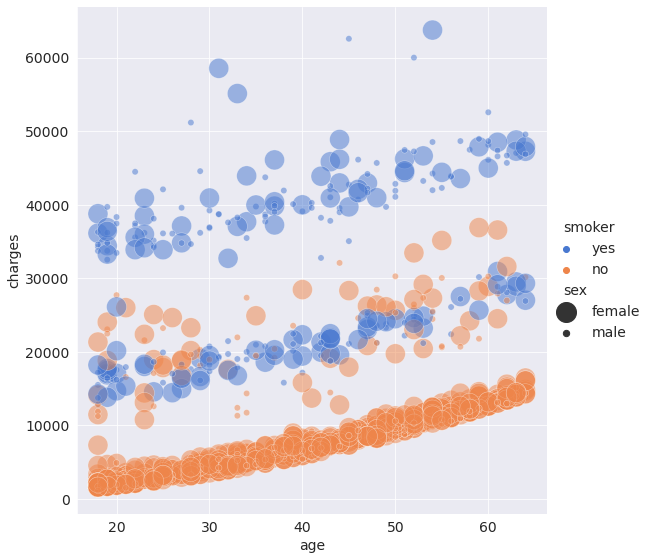

In [21]:
sns.set_style('darkgrid')
sns.relplot(x="age", y="charges", hue="smoker", size="sex", 
            sizes=(40, 400), alpha=.5, palette="muted", 
            height=8, data=medical_record_df) ;

**Line graph gender based** - Following graph shows a  gender based cost analysis of patients with zero child. The graph has charges on y-axis and ages of patients on x-axis.

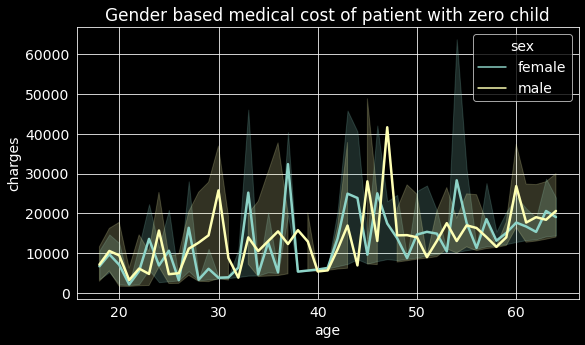

In [22]:
plt.style.use('dark_background')
plt.title('Gender based medical cost of patient with zero child')
sns.lineplot(data=zerochild_df, x="age", y="charges", hue="sex",linewidth=2.5);

**Line graph** - Following is a line graph of medical charge of all patients color coded according to their gender.

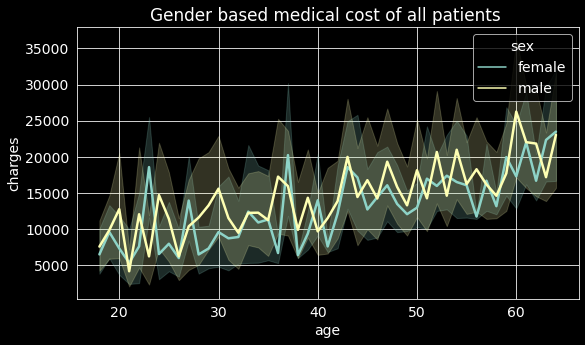

In [24]:
plt.style.use('dark_background')
plt.title('Gender based medical cost of all patients ')
sns.lineplot(data=medical_record_df, x="age", y="charges", hue="sex",linewidth=2.5);

**Histogram** - Following histogram shows the distribution of patients based on number of children they have. It is a stacked histogram which shows how many patients have charges in a particular range.

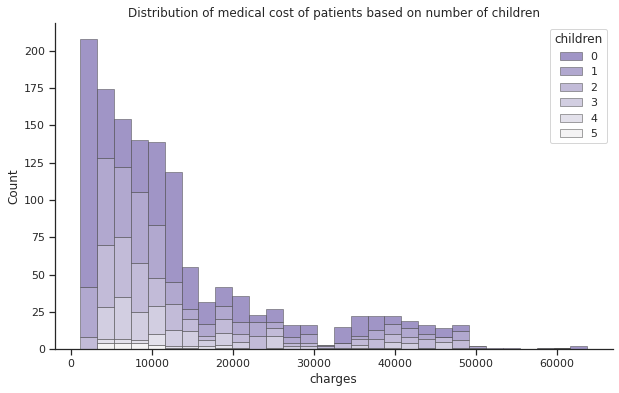

In [30]:
sns.set_theme(style="ticks")  
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of medical cost of patients based on number of children')
sns.despine(f)  
sns.histplot( medical_record_df, x="charges", hue="children", multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5); 

**Histogram** - Following histogram shows the distribution of patients based on region they belong to. It is a stacked histogram which shows how many patients have charges in a particular range.

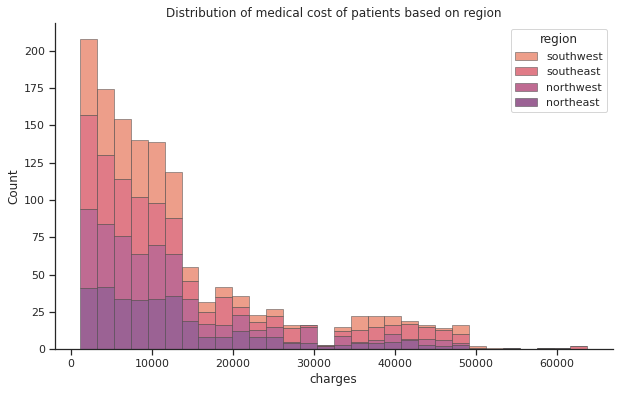

In [31]:
sns.set_theme(style="ticks")  
f, ax = plt.subplots(figsize=(10, 6))  
sns.despine(f)
ax.set_title('Distribution of medical cost of patients based on region')
sns.histplot( medical_record_df, x="charges", hue="region", multiple="stack", palette="flare", edgecolor=".3", linewidth=.5); 

**Horizontal bar graph** - This is a horizontal bar graph which has different regions marked on the y-axis and color coded according to number of children patients have.

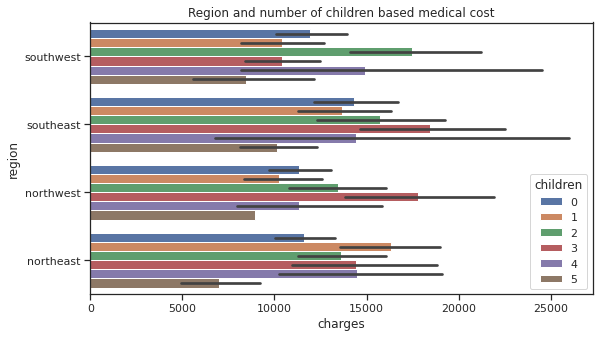

In [32]:
plt.title('Region and number of children based medical cost')
sns.barplot(x="charges", y="region", data=medical_record_df, hue='children'); 

**Scatter Matrix** - Here is a matrix of scatter plots each plot shows data for patients with different number of children, further each plot has been color coded according to region and gender. Each scatter plot shows charges of patients vs. age of patients.

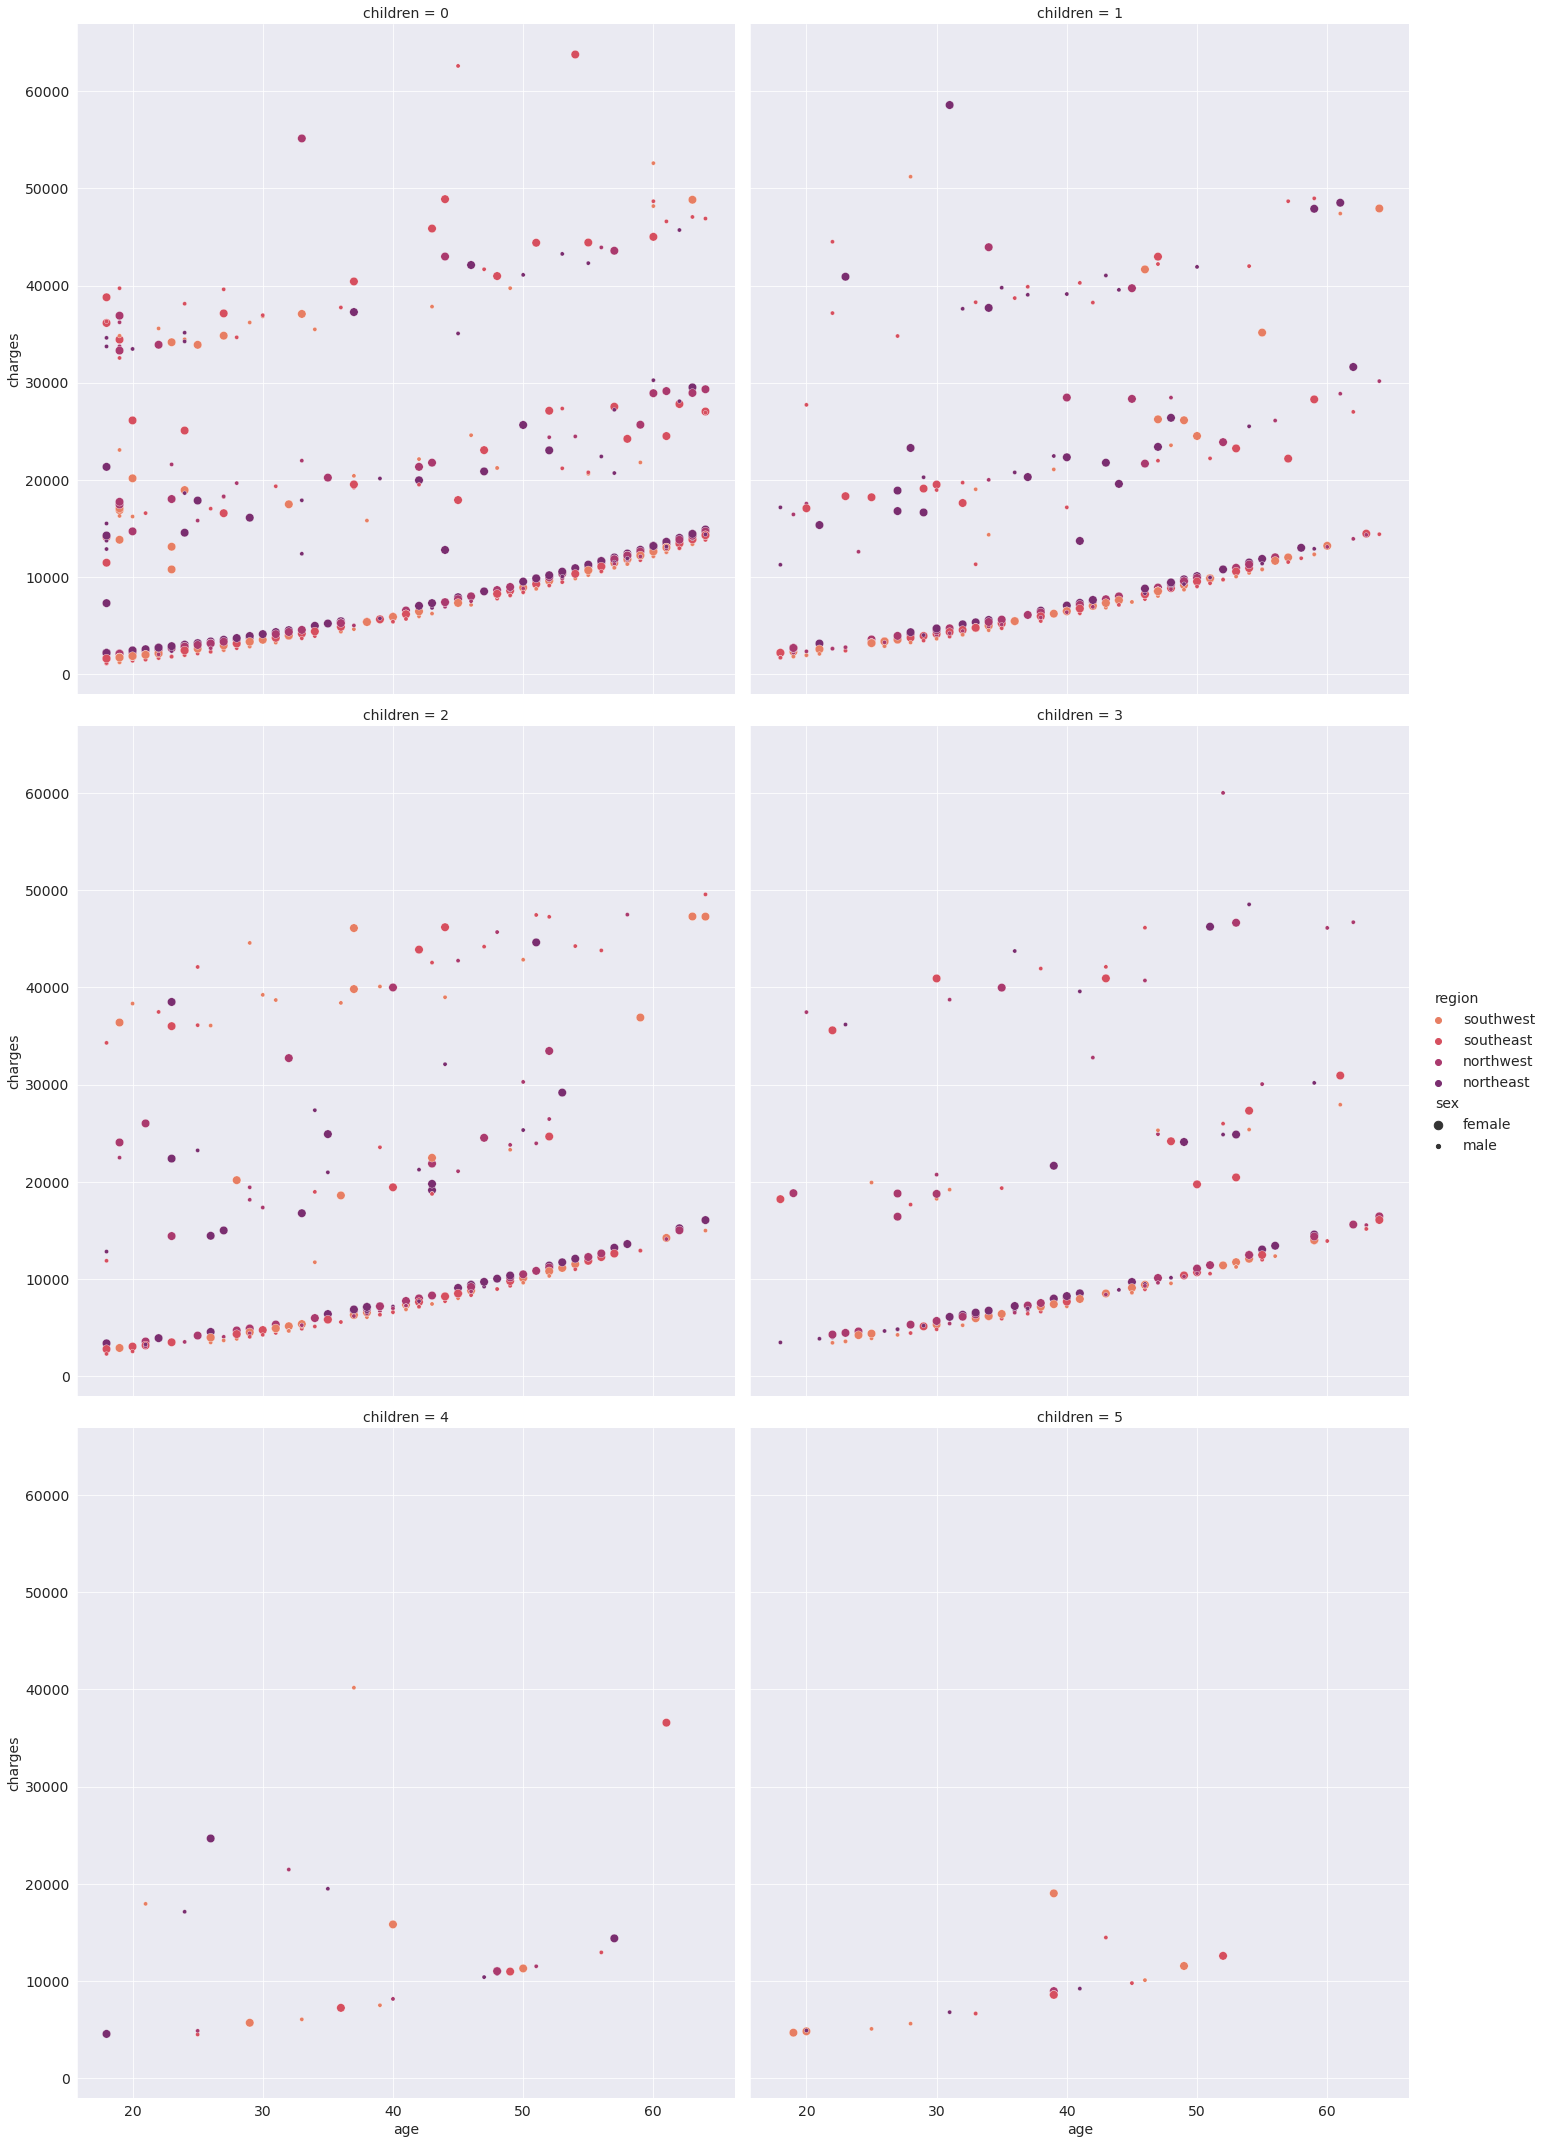

In [28]:
sns.relplot(
    data=medical_record_df, x="age", y="charges", col="children", col_wrap=2,
    hue="region", size="sex", kind="scatter", height=10, palette="flare"
);

Let us save and upload our work to Jovian before continuing

In [30]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mansi3393/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mansi3393/zerotopandas-course-project-starter


'https://jovian.ai/mansi3393/zerotopandas-course-project-starter'

## Asking and Answering Questions

Here we ask some question regarding the datasets given and use Pandas and Numpy to analyse it. 



#### Q1: What is the average bmi among people who paid the least for their medical charges ?

In [21]:
lowest_df=medical_record_df.sort_values('charges').head(10) 
lowest_df

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


Using sort_values function we sort the charges in ascending order and head function gives us bottom 10 medical costs of entire data. We then use this data to find mean of the bmi of people who paid the least.

In [22]:
lowest_df['bmi'].mean()

36.344

#### Q2: What percentage of patients have zero child out of all the patients whose data is collected ?

In [39]:
my_df = medical_record_df.groupby('children').count()
my_df

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


In [45]:
Total_patients = 1338
percentage_of_zerochild = (my_df['charges'][0]/Total_patients)*100
print('There are {} percent patients having zero child'.format(percentage_of_zerochild))

There are 42.89985052316891 percent patients having zero child


Here we have calculated the number of people that have no children using the group by function and applying it on 'children' column, then we calculated the percentage.

#### Q3: What is average medical charge paid by men as compared to women ?

In [41]:
female_record_df=medical_record_df[medical_record_df['sex']=='female']
female_record_df['charges'].mean() 

12569.57884383534

In [42]:
male_record_df=medical_record_df[medical_record_df['sex']=='male']
male_record_df['charges'].mean() 

13956.751177721886

We first filter the patients according to the gender and then calculate the mean medical charge for each data set separately using mean function.

#### Q4: What is the average medical charge paid by by smoker vs. a non-smoker ?

In [44]:
smoker_record_df=medical_record_df[medical_record_df['smoker']=='yes'] 
smoker_record_df['charges'].mean() 

32050.23183153285

In [46]:
nonsmoker_record_df=medical_record_df[medical_record_df['smoker']=='no'] 
nonsmoker_record_df['charges'].mean() 

8434.268297856199

We first filter the patients according to the gender and then calculate the mean medical charge for each data set separately using mean function. We find that smoker an average of 32050 and non-smoker pay around 8434.

#### Q5: What percentage of patients belong to the southeast region ?

In [46]:
region_df = medical_record_df.groupby('region').count()
region_df

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [48]:
Total_patients = 1338
percentage_of_southeast = (region_df['charges'][2]/Total_patients)*100
print('There are {} percent patients that come from southeast region'.format(percentage_of_southeast))

There are 27.204783258594915 percent patients that come from southeast region


Here we have calculated the number of people that belong to southeast using the group by function and applying it on 'region' column, then we calculated the percentage.

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

* We first loaded data in CSV format using pandas and performed different operations on it to analyse it better.
* Out of all the patient whose data was collected we found that people paying lowest medical charges have an average bmi of 36.34
* We found that female patients pay lesser than male patients. Female patients pay an average 12569.57 while male patients on average pay 13956.75
* We found that most patients have zero child. Out of all the patients, around 42.9% have zero child.
* We are able to conclude that smokers pay way more than non-smokers.Patients who smoke on an average pay 32050.23 and those who do not smoke on an average pay 8434.26.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

* Zerotopandas course from freecodecamp is an important resource to learn Data Analysis.
* Dataset was collected from https://www.kaggle.com/datasets?fileType=csv page from Kaggle.com 
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html
* Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
* Matplotlib tutorial: https://github.com/rougier/matplotlib-tutorial

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>